## Explore the Input Variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# read in relevant datasets

# input gentrifying lsoas dataset from 1st clustering round
cluster_1_gen = pd.read_csv("cluster_1_gen.csv").drop(columns=["Unnamed: 0"])

# input variables for clustering
cluster_2_data = pd.read_csv("cluster_2_data.csv").drop(columns=["Unnamed: 0"])

In [3]:
cluster_1_gen.head()

,LSOA_Code,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01,cluster_1_yeoJohnson_decile_labels,cluster_1_yJ_decile_cat
0,E01000136,17.211704,5.163511,2.235650,1.39,-0.42,1.56,-0.81,19.56,1,GEN
1,E01000146,31.914894,13.677812,2.652839,-1.88,1.42,-1.08,1.30,13.24,1,GEN
2,E01000169,5.899705,2.949853,2.404371,1.31,-0.97,4.06,1.00,11.51,1,GEN
3,E01000181,6.088280,7.610350,2.410383,2.23,-2.12,2.78,1.28,8.82,1,GEN
4,E01000201,13.257576,1.893939,2.153846,1.89,0.54,-3.92,5.25,16.14,1,GEN


In [4]:
cluster_2_data = cluster_2_data.set_index("LSOA11CD")
cluster_2_data.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_01,hseP_01
LSOA11CD,,,,,,,,,,,,,,
E01000001,3.87,6.84,1.77,1.15,0.14,0.58,-0.11,102.506682,43.589744,-9.59,-0.47,5.72,45.63,245.424
E01000002,5.28,2.11,2.50,0.77,0.30,-0.77,0.27,125.000000,47.431621,-8.96,-3.26,8.52,44.97,235.000
E01000003,3.29,4.69,-2.00,2.02,-0.03,-0.39,1.37,76.315789,49.022846,-0.31,-5.12,3.23,36.33,190.000
E01000005,0.24,4.69,0.92,3.20,2.14,1.67,2.64,118.181818,48.239772,1.13,-4.99,2.15,31.53,137.500
E01000006,1.49,-3.70,-2.51,7.87,-1.49,0.55,0.88,287.500000,44.916540,-12.34,-7.46,20.72,26.36,60.000


In [5]:
# extract only LSOA codes for gentrifying LSOAs

cluster_2 = cluster_1_gen.drop(cluster_1_gen.columns[1:11],axis=1)

In [6]:
cluster_2.head()

,LSOA_Code
0,E01000136
1,E01000146
2,E01000169
3,E01000181
4,E01000201


In [7]:
# merge gentrifying LSOAs with their corresponding input variables

cluster_2 = cluster_2.merge(cluster_2_data, left_on="LSOA_Code", right_on="LSOA11CD",how="left").set_index("LSOA_Code")

In [8]:
cluster_2.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_01,hseP_01
LSOA_Code,,,,,,,,,,,,,,
E01000136,2.27,2.55,3.71,3.32,-0.35,1.61,0.37,882.694147,58.633574,-6.45,-1.58,3.94,37.47,287.475
E01000146,-1.47,-5.98,1.99,6.07,1.23,1.78,1.26,169.552220,31.619048,-7.65,-1.21,6.55,31.50,309.750
E01000169,2.66,-2.43,-0.09,5.69,-0.31,1.73,3.29,190.330189,40.925267,-7.20,0.37,6.31,28.10,106.000
E01000181,4.40,0.89,-0.75,4.36,0.71,0.37,-0.41,312.676056,49.576271,-4.47,-0.52,3.53,30.68,177.500
E01000201,4.74,1.68,0.80,5.57,-1.48,1.24,-0.58,253.389831,46.307957,-2.34,-0.25,0.48,34.94,295.000


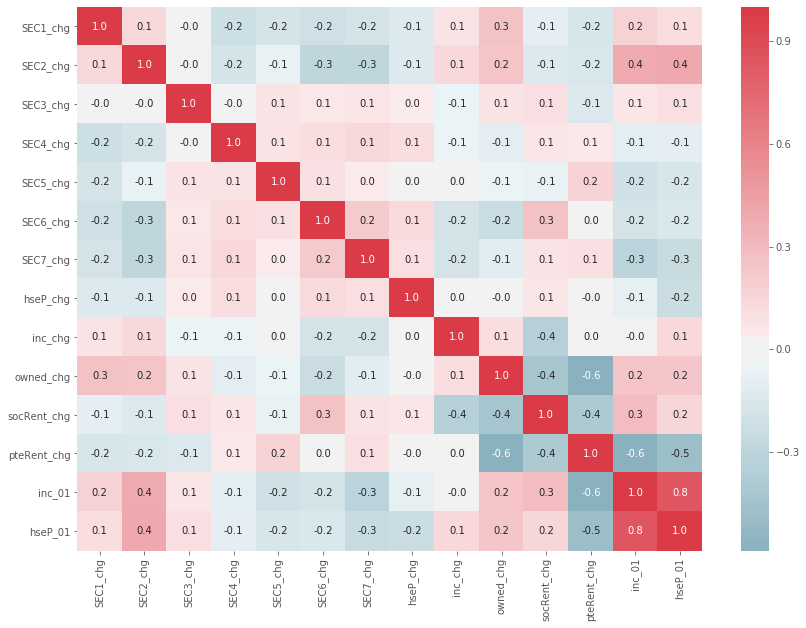

In [9]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_2.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

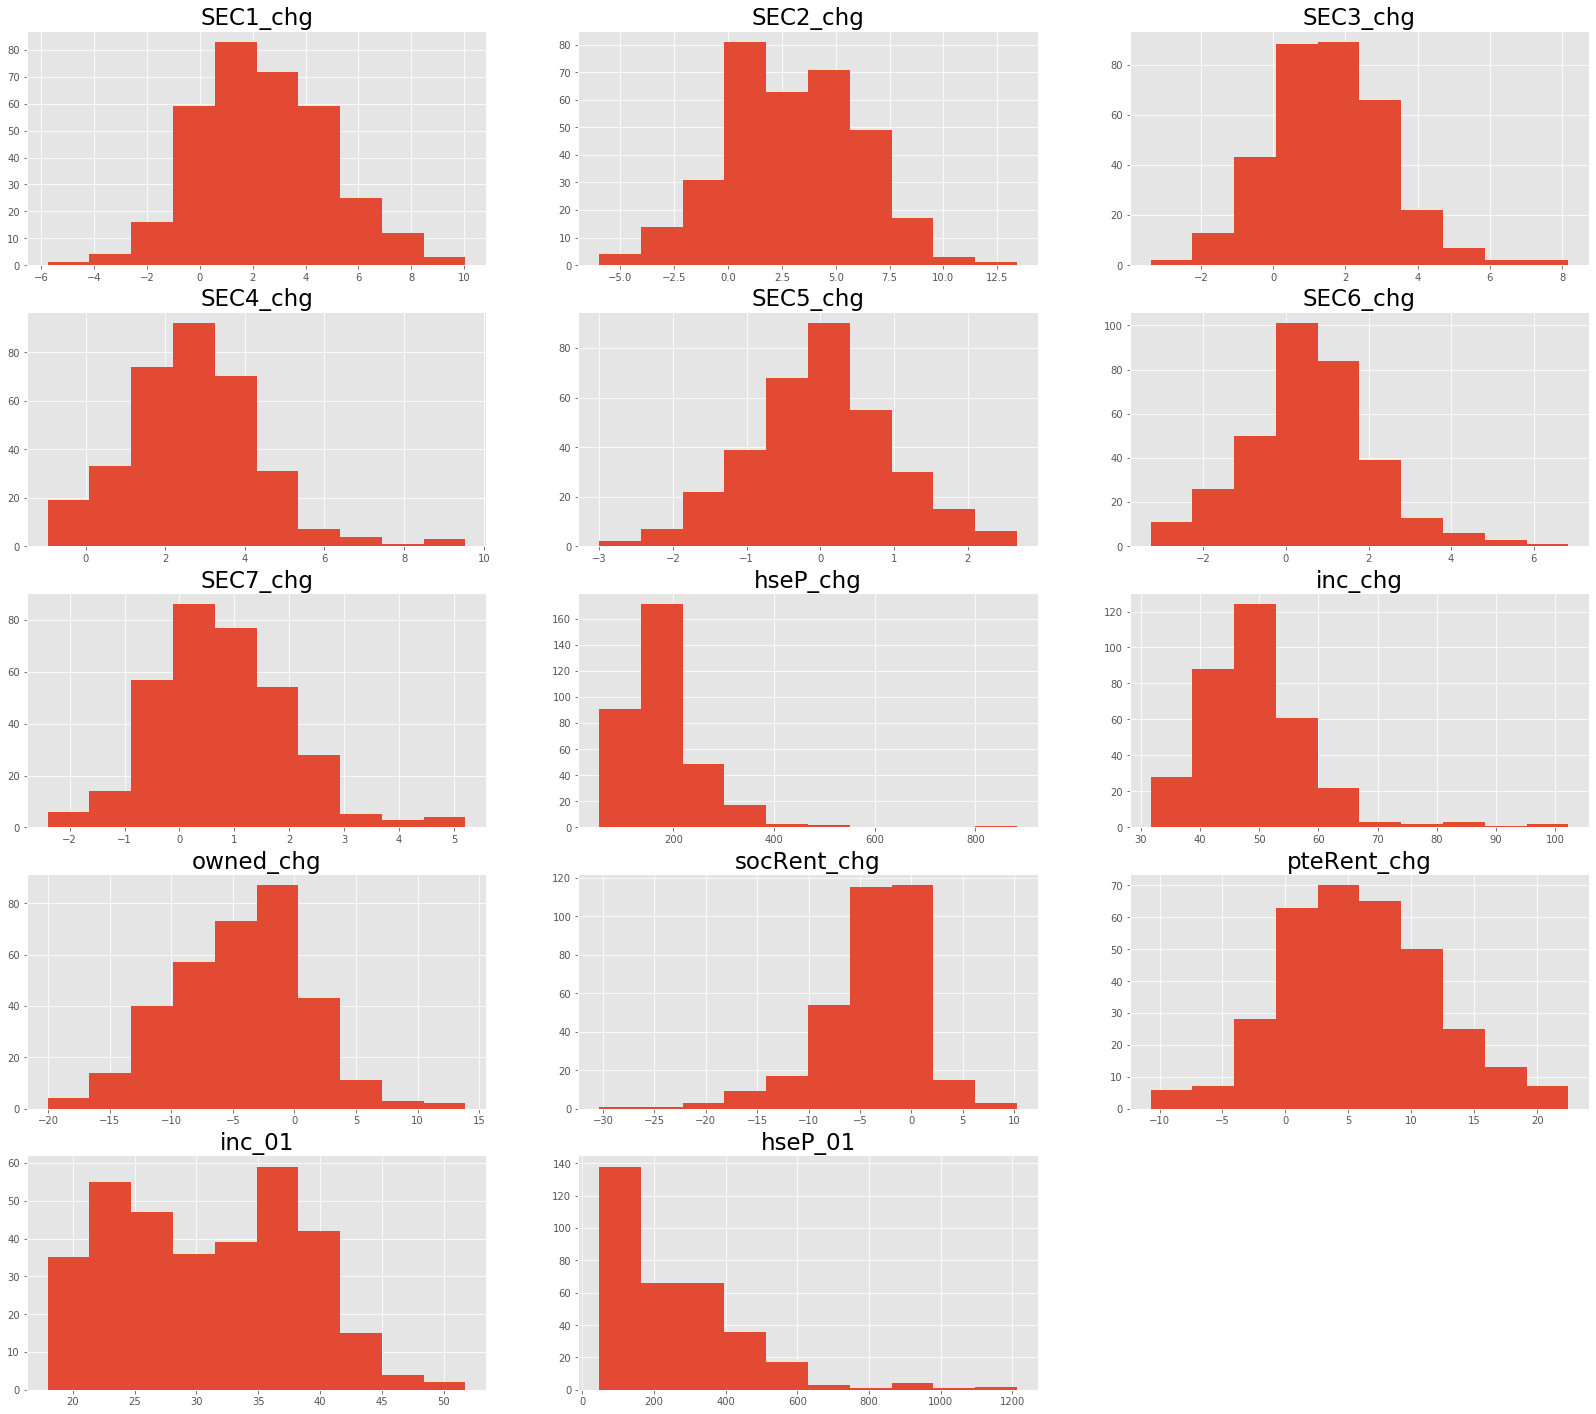

In [10]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(28, 25))

counter = 0
for i in range(5):
    for j in range(3):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_2.columns):

            ax.hist(cluster_2[cluster_2.columns[counter]], label='{}'.format(cluster_2.columns[counter]))
            ax.set_title(cluster_2.columns[counter], fontsize=23)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

# to output high-resolution image - uncomment the next line
# plt.savefig('Cluster_1_hist.png', dpi = 100)

In [11]:
## Transforming the Input Variables

In [12]:
# without any transformation

cluster_2_noTrans = cluster_2[:]

In [13]:
# applying cube root transformation to data variables

cluster_2_cubeRoot = np.cbrt(cluster_2)

In [14]:
cluster_2_cubeRoot.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_01,hseP_01
LSOA_Code,,,,,,,,,,,,,,
E01000136,1.314242,1.366197,1.548073,1.491807,-0.704730,1.172039,0.717905,9.592609,3.884920,-1.861458,-1.164713,1.579424,3.346272,6.599839
E01000146,-1.137031,-1.815099,1.257818,1.824160,1.071441,1.211918,1.080082,5.534790,3.162153,-1.970397,-1.065602,1.871029,3.158180,6.766080
E01000169,1.385566,-1.344421,-0.448140,1.785271,-0.676790,1.200463,1.487300,5.752225,3.446121,-1.930979,0.717905,1.847891,3.040200,4.732623
E01000181,1.638643,0.961900,-0.908560,1.633662,0.892112,0.717905,-0.742896,6.787318,3.673595,-1.647287,-0.804145,1.522620,3.130534,5.619954
E01000201,1.679807,1.188784,0.928318,1.772631,-1.139604,1.074337,-0.833955,6.327950,3.591026,-1.327614,-0.629961,0.782974,3.269196,6.656930


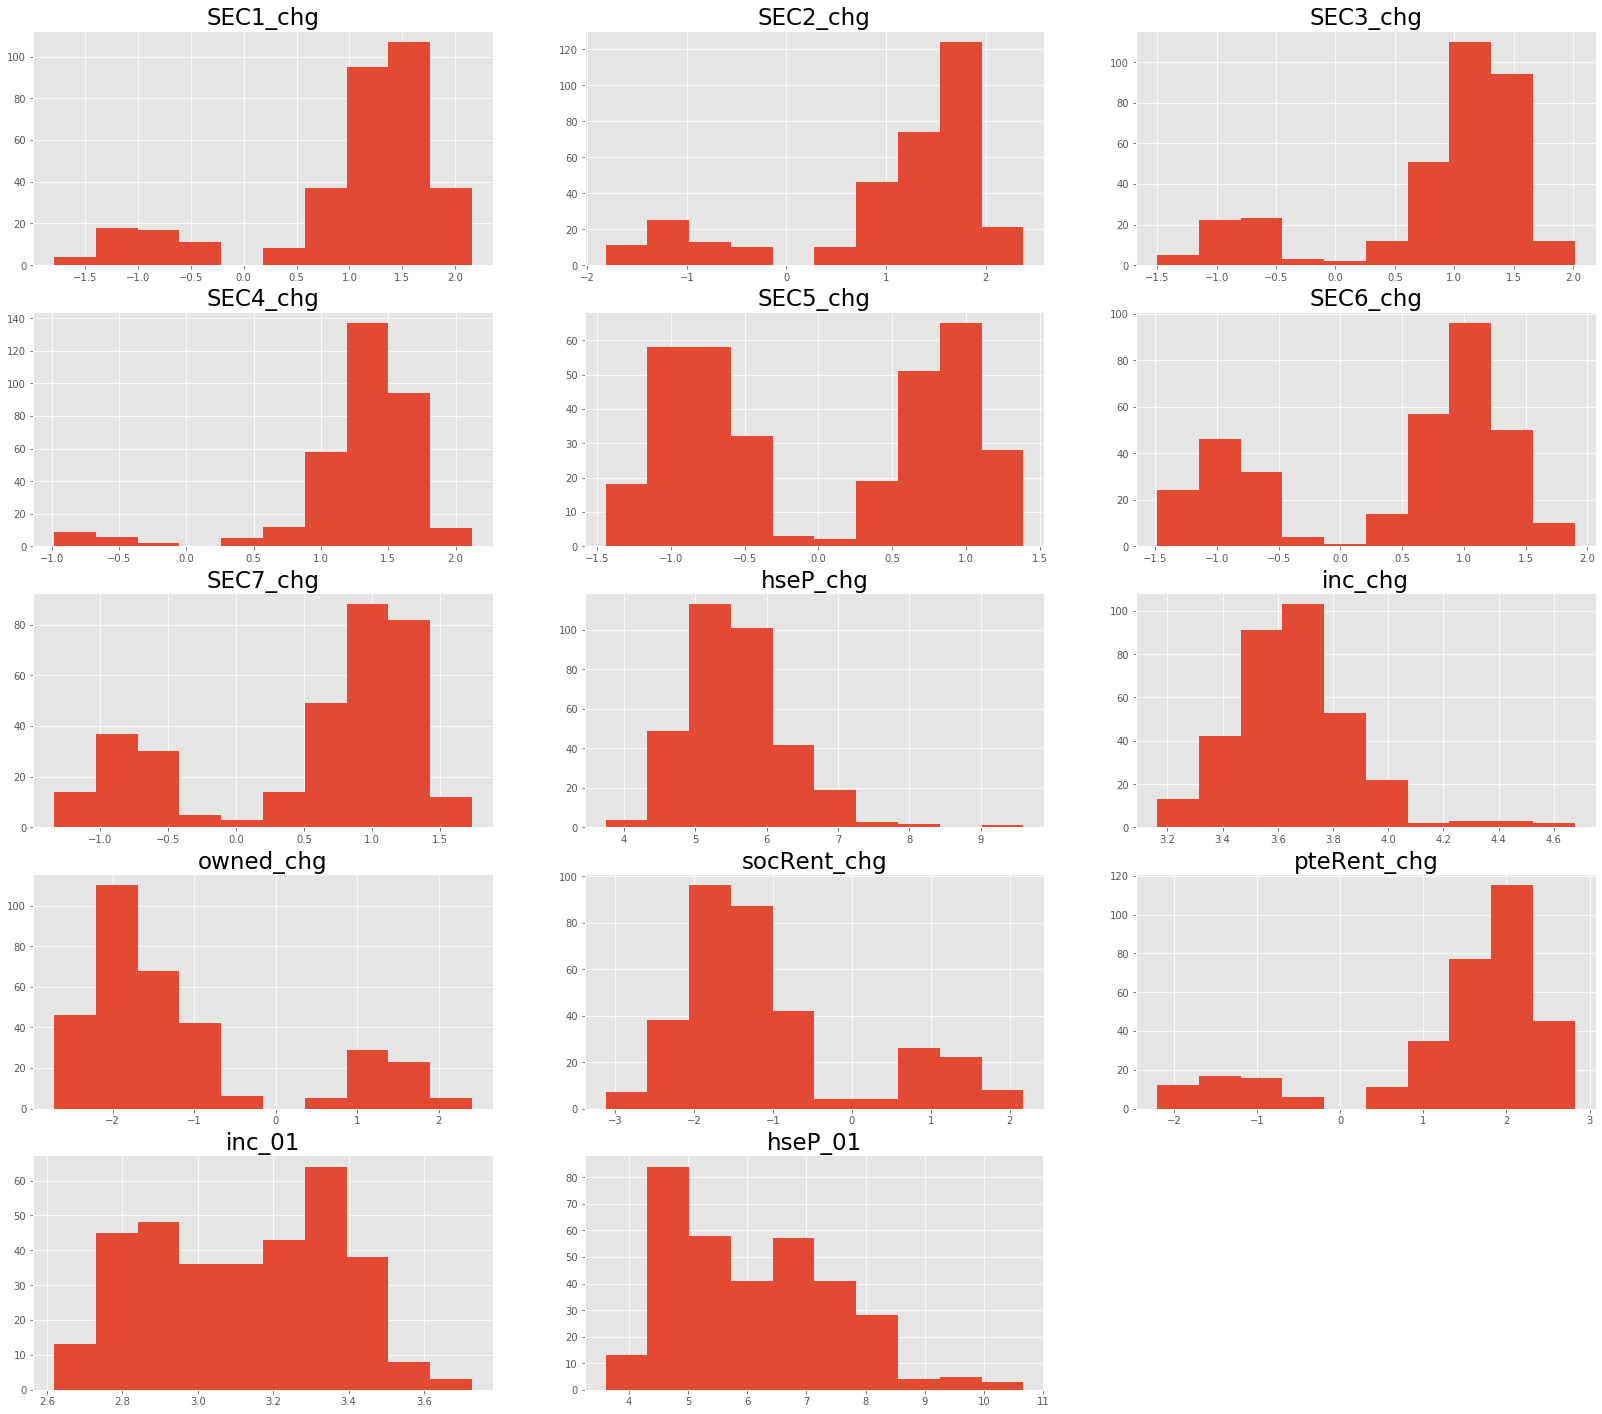

In [15]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(28, 25))

counter = 0
for i in range(5):
    for j in range(3):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_2_cubeRoot.columns):

            ax.hist(cluster_2_cubeRoot[cluster_2_cubeRoot.columns[counter]], label='{}'.format(cluster_2_cubeRoot.columns[counter]))
            ax.set_title(cluster_2_cubeRoot.columns[counter], fontsize=23)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

# to output high-resolution image - uncomment the next line
# plt.savefig('Cluster_1_hist.png', dpi = 100)

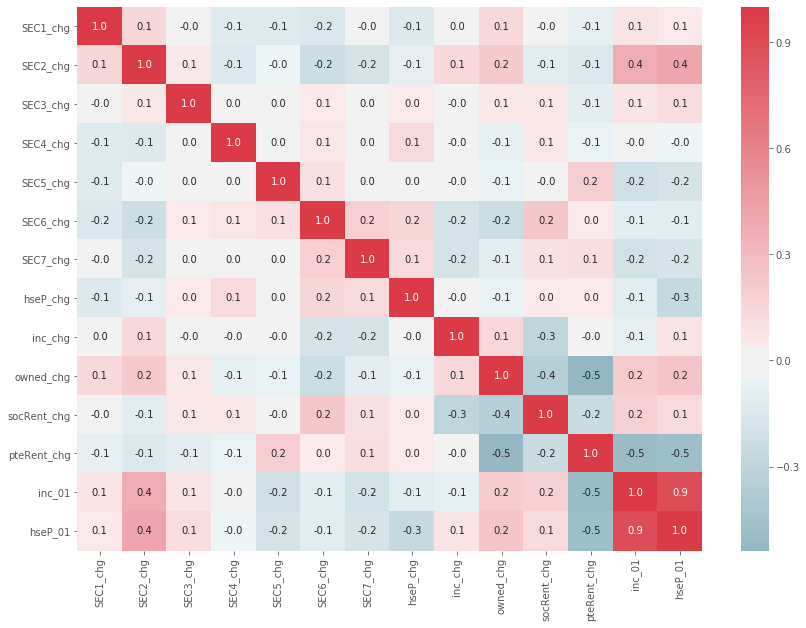

In [16]:
# check for multi-collinearity between variables

fig10, ax = plt.subplots()
fig10.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_2_cubeRoot.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [17]:
# applying the Yeo-Johnson transformation to data variables

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(cluster_2)

cluster_2_yeoJohnson = pt.transform(cluster_2)

In [18]:
cluster_2_yeoJohnson = pd.DataFrame(cluster_2_yeoJohnson, index = cluster_2.index, columns = cluster_2.columns)

In [19]:
cluster_2_yeoJohnson.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_01,hseP_01
LSOA_Code,,,,,,,,,,,,,,
E01000136,-0.012094,-0.114984,1.300847,0.433247,-0.385708,0.668547,-0.274067,3.584496,1.062568,-0.371187,0.332233,-0.305432,0.901851,0.502913
E01000146,-1.635421,-2.941042,0.303721,1.879772,1.278336,0.775474,0.450652,0.051719,-3.018021,-0.589886,0.413271,0.125136,0.140214,0.610947
E01000169,0.144096,-1.740166,-1.027567,1.691177,-0.343684,0.744063,1.915954,0.367093,-1.034206,-0.507924,0.799353,0.085797,-0.333185,-1.061733
E01000181,0.826899,-0.645508,-1.508128,1.004865,0.729883,-0.125340,-0.993857,1.592431,0.168880,-0.009271,0.571897,-0.373717,0.028974,-0.224711
E01000201,0.958127,-0.392134,-0.432237,1.630984,-1.571217,0.434451,-1.163593,1.097955,-0.235238,0.382062,0.637505,-0.890811,0.588763,0.540455


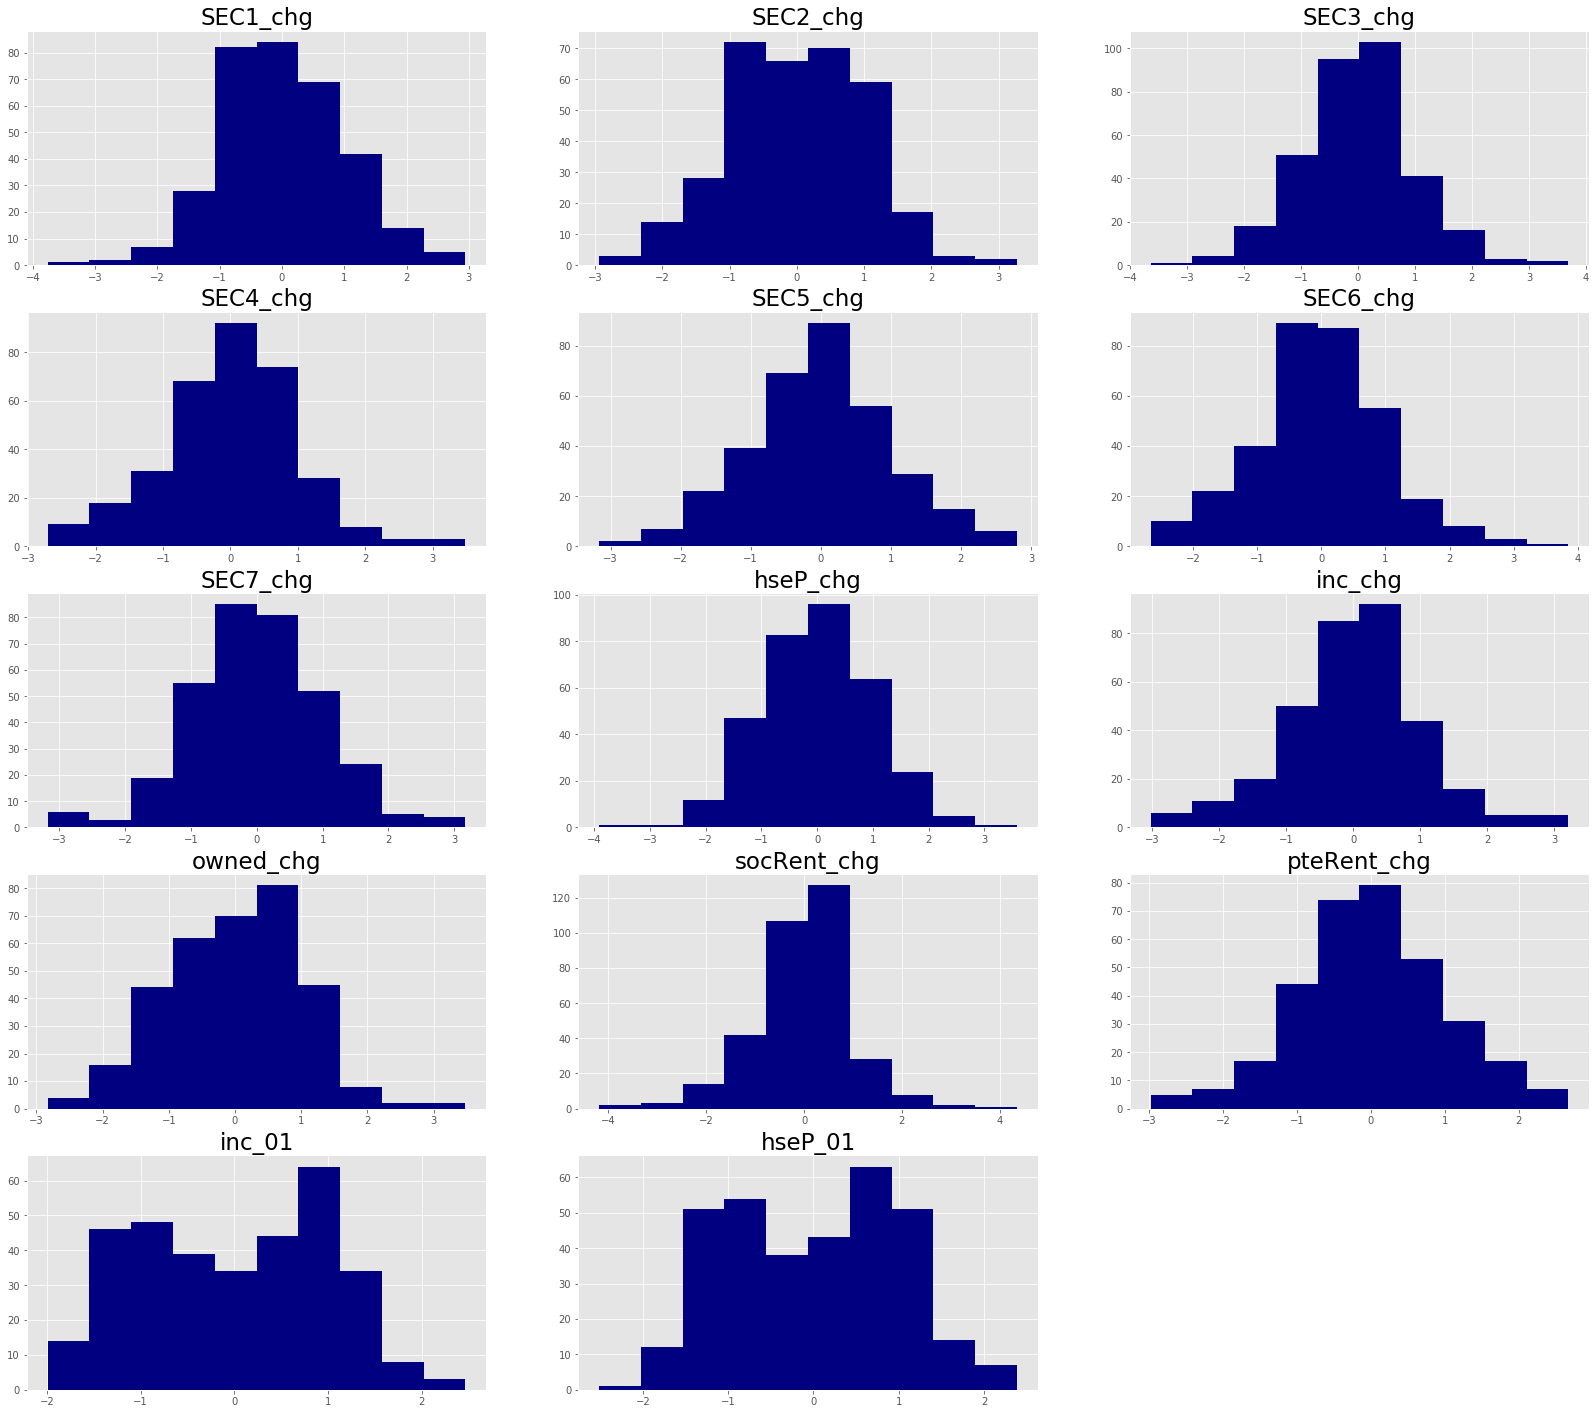

In [20]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(28, 25))

counter = 0
for i in range(5):
    for j in range(3):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_2_yeoJohnson.columns):

            ax.hist(cluster_2_yeoJohnson[cluster_2_yeoJohnson.columns[counter]], label='{}'.format(cluster_2_yeoJohnson.columns[counter]),color='navy')
            ax.set_title(cluster_2_yeoJohnson.columns[counter], fontsize=23)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

# to output high-resolution image - uncomment the next line
# plt.savefig('Cluster_1_hist.png', dpi = 100)

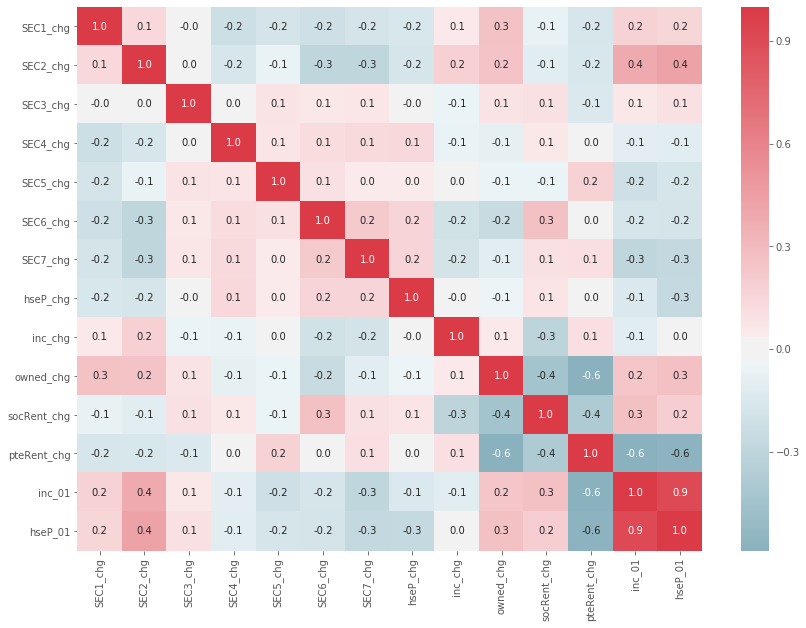

In [21]:
# check for multi-collinearity between variables

fig11, ax = plt.subplots()
fig11.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_2_yeoJohnson.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [22]:
# applying the inverse hyperbolic sine transformation to data variables

cluster_2_invSine = np.arcsinh(cluster_2)

In [23]:
cluster_2_invSine.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_01,hseP_01
LSOA_Code,,,,,,,,,,,,,,
E01000136,1.558251,1.665642,2.021866,1.915058,-0.343222,1.254271,0.362039,7.476126,4.764527,-2.563183,-1.238335,2.080057,4.316866,6.354286
E01000146,-1.178006,-2.488487,1.439154,2.503223,1.035038,1.340686,1.053825,5.826317,4.147157,-2.732098,-1.022359,2.578389,4.143387,6.428915
E01000169,1.705068,-1.620915,-0.089879,2.439491,-0.305238,1.315932,1.906370,5.941914,4.405044,-2.672016,0.362039,2.541503,4.029233,5.356609
E01000181,2.187422,0.801415,-0.693147,2.178518,0.660840,0.362039,-0.399304,6.438317,4.596761,-2.202819,-0.499028,1.973930,4.117024,5.872126
E01000201,2.260130,1.290635,0.732668,2.418505,-1.183618,1.041331,-0.551600,6.228080,4.528578,-1.586112,-0.247466,0.463252,4.246984,6.380125


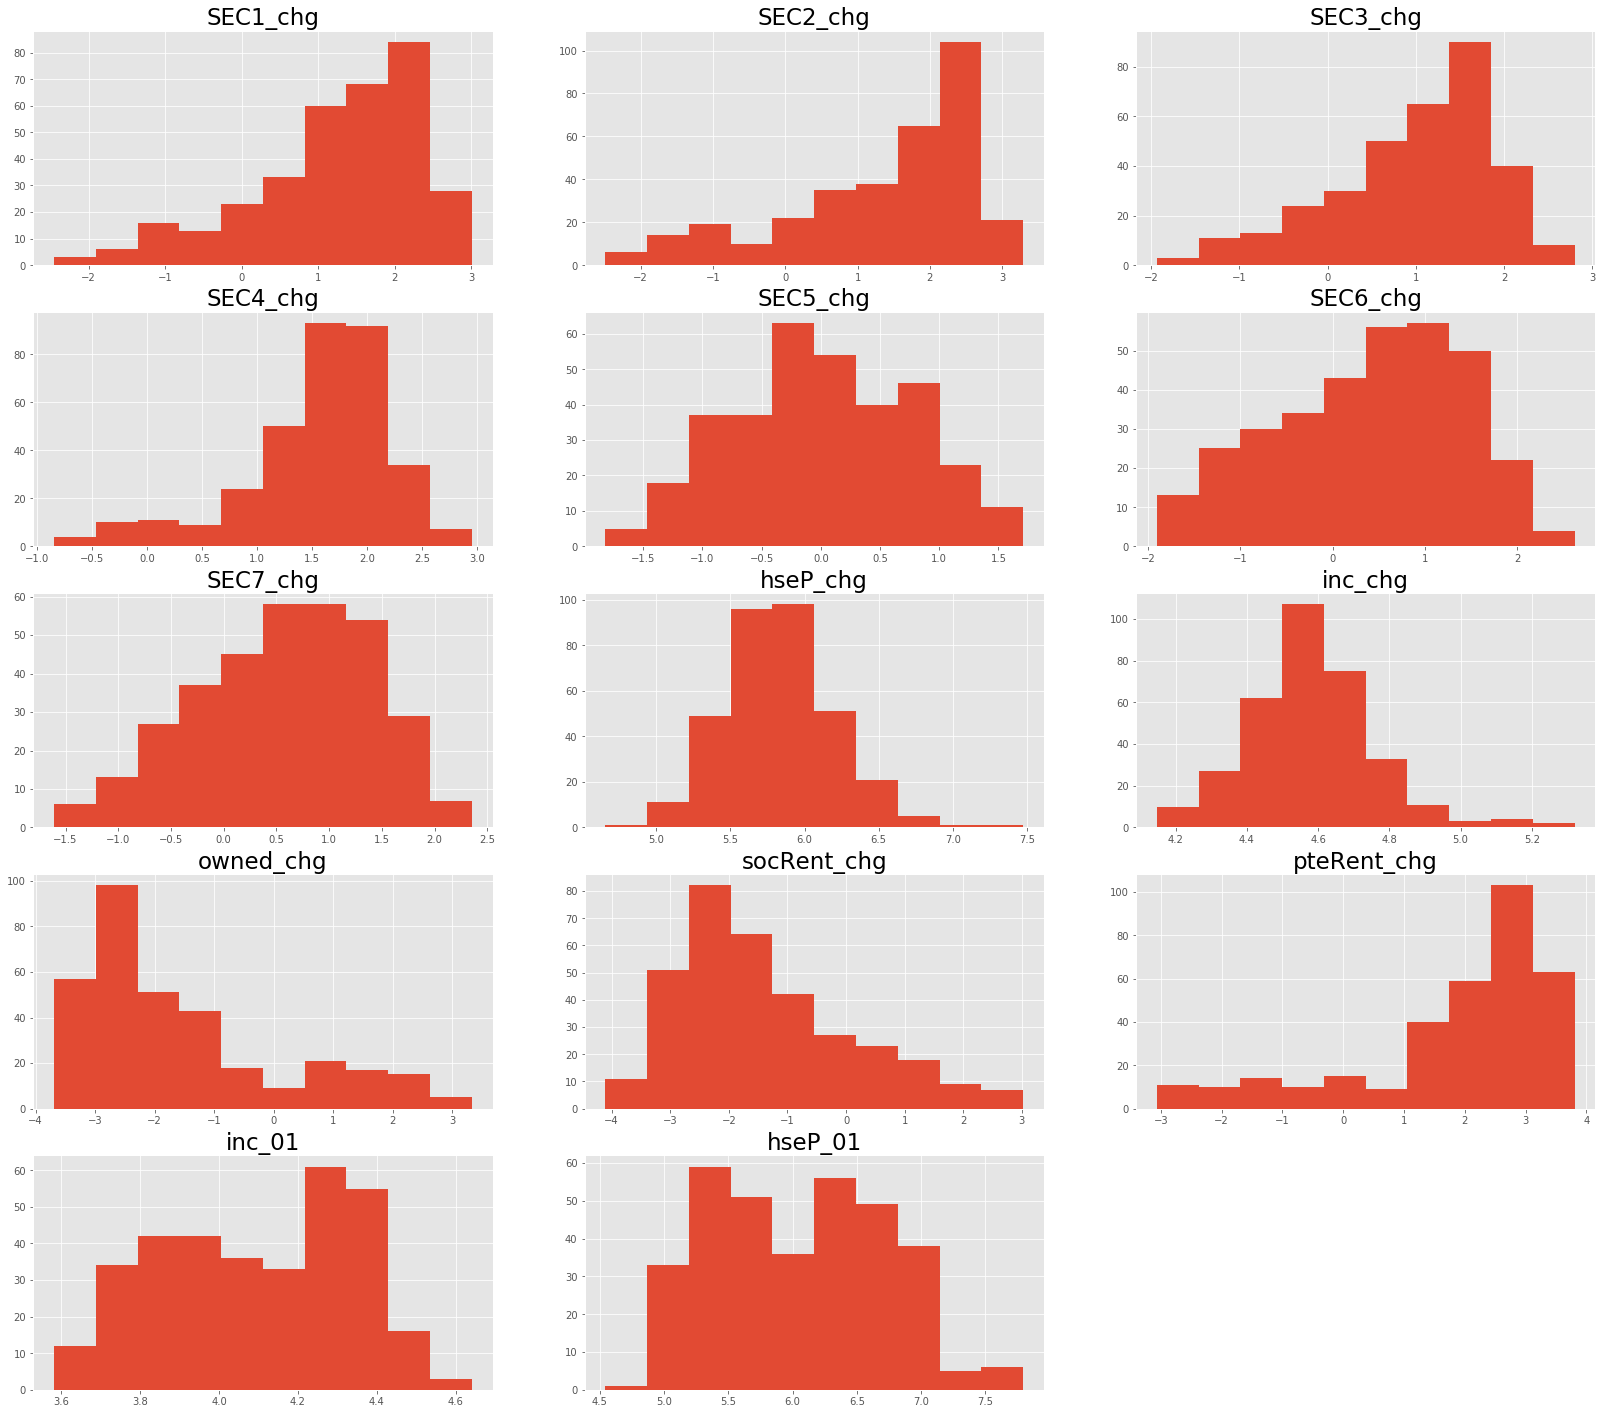

In [24]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(28, 25))

counter = 0
for i in range(5):
    for j in range(3):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_2_invSine.columns):

            ax.hist(cluster_2_invSine[cluster_2_invSine.columns[counter]], label='{}'.format(cluster_2_invSine.columns[counter]))
            ax.set_title(cluster_2_invSine.columns[counter], fontsize=23)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

# to output high-resolution image - uncomment the next line
#plt.savefig('Cluster_1_hist.png', dpi = 100)

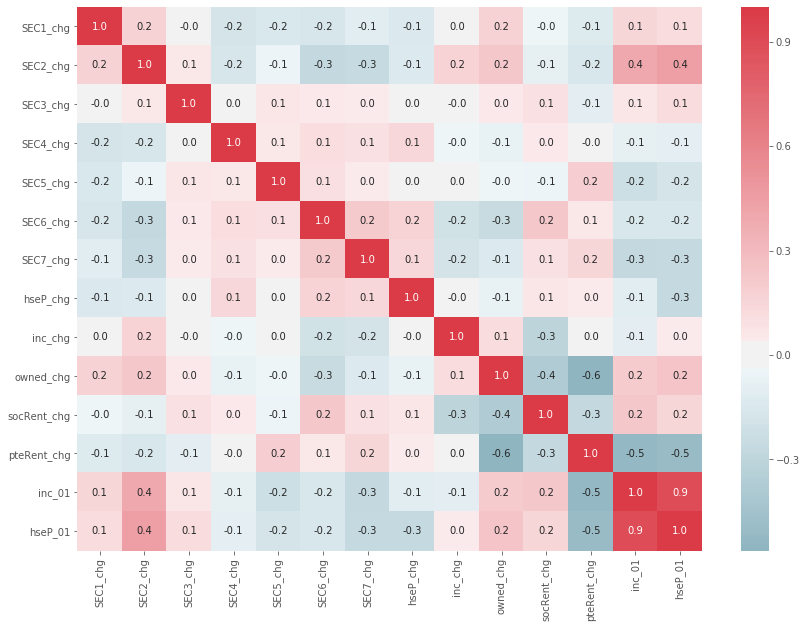

In [25]:
# check for multi-collinearity between variables

fig12, ax = plt.subplots()
fig12.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_2_invSine.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [26]:
## Re-scaling the Input Variables

In [27]:
# applying z-score standardisation on all 4 datasets

from scipy.stats import zscore

cluster_2_noTrans_zscore = cluster_2_noTrans.apply(zscore)
cluster_2_cubeRoot_zscore = cluster_2_cubeRoot.apply(zscore)
cluster_2_yeoJohnson_zscore = cluster_2_yeoJohnson.apply(zscore)
cluster_2_invSine_zscore = cluster_2_invSine.apply(zscore)

In [28]:
# applying RobustScaler (inter-quartile range standardisation) on all 4 datasets

from sklearn.preprocessing import RobustScaler

transformer1 = RobustScaler().fit(cluster_2_noTrans)
cluster_2_noTrans_robust = transformer1.transform(cluster_2_noTrans)
cluster_2_noTrans_robust = pd.DataFrame(cluster_2_noTrans_robust, index = cluster_2_noTrans.index, columns = cluster_2_noTrans.columns)


transformer2 = RobustScaler().fit(cluster_2_cubeRoot)
cluster_2_cubeRoot_robust = transformer2.transform(cluster_2_cubeRoot)
cluster_2_cubeRoot_robust = pd.DataFrame(cluster_2_cubeRoot_robust, index = cluster_2_cubeRoot.index, columns = cluster_2_cubeRoot.columns)


transformer3 = RobustScaler().fit(cluster_2_yeoJohnson)
cluster_2_yeoJohnson_robust = transformer3.transform(cluster_2_yeoJohnson)
cluster_2_yeoJohnson_robust = pd.DataFrame(cluster_2_yeoJohnson_robust, index = cluster_2_yeoJohnson.index, columns = cluster_2_yeoJohnson.columns)


transformer4 = RobustScaler().fit(cluster_2_invSine)
cluster_2_invSine_robust = transformer4.transform(cluster_2_invSine)
cluster_2_invSine_robust = pd.DataFrame(cluster_2_invSine_robust, index = cluster_2_invSine.index, columns = cluster_2_invSine.columns)

In [29]:
# applying RobustScaler (inter-decile range standardisation) on all 4 datasets

transformer5 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_2_noTrans)
cluster_2_noTrans_decile = transformer5.transform(cluster_2_noTrans)
cluster_2_noTrans_decile = pd.DataFrame(cluster_2_noTrans_decile, index = cluster_2_noTrans.index, columns = cluster_2_noTrans.columns)


transformer6 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_2_cubeRoot)
cluster_2_cubeRoot_decile = transformer6.transform(cluster_2_cubeRoot)
cluster_2_cubeRoot_decile = pd.DataFrame(cluster_2_cubeRoot_decile, index = cluster_2_cubeRoot.index, columns = cluster_2_cubeRoot.columns)


transformer7 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_2_yeoJohnson)
cluster_2_yeoJohnson_decile = transformer7.transform(cluster_2_yeoJohnson)
cluster_2_yeoJohnson_decile = pd.DataFrame(cluster_2_yeoJohnson_decile, index = cluster_2_yeoJohnson.index, columns = cluster_2_yeoJohnson.columns)


transformer8 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_2_invSine)
cluster_2_invSine_decile = transformer8.transform(cluster_2_invSine)
cluster_2_invSine_decile = pd.DataFrame(cluster_2_invSine_decile, index = cluster_2_invSine.index, columns = cluster_2_invSine.columns)

In [30]:
# check dataset permutations for heavily-skewed variables

df_full = [cluster_2_noTrans_zscore, cluster_2_cubeRoot_zscore, cluster_2_yeoJohnson_zscore, cluster_2_invSine_zscore, cluster_2_noTrans_robust, cluster_2_cubeRoot_robust, cluster_2_yeoJohnson_robust, cluster_2_invSine_robust, cluster_2_noTrans_decile, cluster_2_cubeRoot_decile, cluster_2_yeoJohnson_decile, cluster_2_invSine_decile]
df_full_name = ["cluster_2_noTrans_zscore", "cluster_2_cubeRoot_zscore", "cluster_2_yeoJohnson_zscore", "cluster_2_invSine_zscore", "cluster_2_noTrans_robust", "cluster_2_cubeRoot_robust", "cluster_2_yeoJohnson_robust", "cluster_2_invSine_robust", "cluster_2_noTrans_decile", "cluster_2_cubeRoot_decile", "cluster_2_yeoJohnson_decile", "cluster_2_invSine_decile"]

for method in range(len(df_full)):
    counter = 0
    for col in range(0,8):
        if df_full[method][df_full[method].columns[col]].skew() > 1:
            counter += 1
        elif df_full[method][df_full[method].columns[col]].skew() <- 1:
            counter += 1
    print(str(df_full_name[method]) + " has " + str(counter) + " variables with skew >1 or <-1 \n")

cluster_2_noTrans_zscore has 1 variables with skew >1 or <-1 

cluster_2_cubeRoot_zscore has 5 variables with skew >1 or <-1 

cluster_2_yeoJohnson_zscore has 0 variables with skew >1 or <-1 

cluster_2_invSine_zscore has 2 variables with skew >1 or <-1 

cluster_2_noTrans_robust has 1 variables with skew >1 or <-1 

cluster_2_cubeRoot_robust has 5 variables with skew >1 or <-1 

cluster_2_yeoJohnson_robust has 0 variables with skew >1 or <-1 

cluster_2_invSine_robust has 2 variables with skew >1 or <-1 

cluster_2_noTrans_decile has 1 variables with skew >1 or <-1 

cluster_2_cubeRoot_decile has 5 variables with skew >1 or <-1 

cluster_2_yeoJohnson_decile has 0 variables with skew >1 or <-1 

cluster_2_invSine_decile has 2 variables with skew >1 or <-1 



For n_clusters = 2 The average silhouette_score is : 0.5361453117332654
For n_clusters = 3 The average silhouette_score is : 0.5179740244874778
For n_clusters = 4 The average silhouette_score is : 0.45786396468681745
For n_clusters = 5 The average silhouette_score is : 0.492402252810993
For n_clusters = 6 The average silhouette_score is : 0.48585219758474707
For n_clusters = 7 The average silhouette_score is : 0.437354566990586
For n_clusters = 8 The average silhouette_score is : 0.4366244667101187
For n_clusters = 9 The average silhouette_score is : 0.39954086791524535
For n_clusters = 10 The average silhouette_score is : 0.39831294123597116


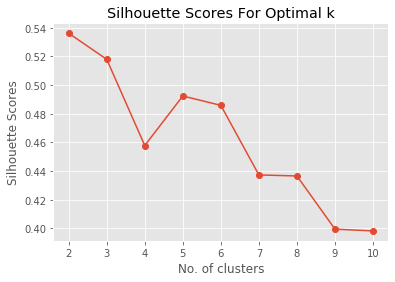

In [31]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_2)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_2, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores For Optimal k')
plt.show()

In [32]:
# k-means clustering for yeo-johnson dataset permutations

from sklearn.cluster import KMeans

cluster_2_yeoJohnson_zscore_kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0, n_init=6000, max_iter=80000).fit(cluster_2_yeoJohnson_zscore)
cluster_2_yeoJohnson_robust_kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0, n_init=6000, max_iter=80000).fit(cluster_2_yeoJohnson_robust)
cluster_2_yeoJohnson_decile_kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0, n_init=6000, max_iter=80000).fit(cluster_2_yeoJohnson_decile)

cluster_2_yeoJohnson_zscore_labels = cluster_2_yeoJohnson_zscore_kmeans.labels_
cluster_2_yeoJohnson_robust_labels = cluster_2_yeoJohnson_robust_kmeans.labels_
cluster_2_yeoJohnson_decile_labels = cluster_2_yeoJohnson_decile_kmeans.labels_

In [33]:
cluster_2_yJ_zscore_original = cluster_2[:]
cluster_2_yJ_zscore_original["cluster_2_yeoJohnson_zscore_labels"]=cluster_2_yeoJohnson_zscore_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
cluster_2_yJ_robust_original = cluster_2[:]
cluster_2_yJ_robust_original["cluster_2_yeoJohnson_robust_labels"]=cluster_2_yeoJohnson_robust_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
cluster_2_yJ_decile_original = cluster_2[:]
cluster_2_yJ_decile_original["cluster_2_yeoJohnson_decile_labels"]=cluster_2_yeoJohnson_decile_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
# creating empty array to hold the performance measure for each cluster derived from individual dataset permutation

permutation = ["yeoJohnson_zscore", "yeoJohnson_robust","yeoJohnson_decile"]
calinski_harabasz_scores = []

In [37]:
# measuring the performance for yeo-johnson dataset permutations

from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.calinski_harabasz_score(cluster_2_yJ_zscore_original, cluster_2_yeoJohnson_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_2_yJ_zscore_original, cluster_2_yeoJohnson_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_2_yJ_robust_original, cluster_2_yeoJohnson_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_2_yJ_robust_original, cluster_2_yeoJohnson_robust_labels))

print(metrics.calinski_harabasz_score(cluster_2_yJ_decile_original, cluster_2_yeoJohnson_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_2_yJ_decile_original, cluster_2_yeoJohnson_decile_labels))

101.8384797710529
60.24921238323012
101.8384797710529


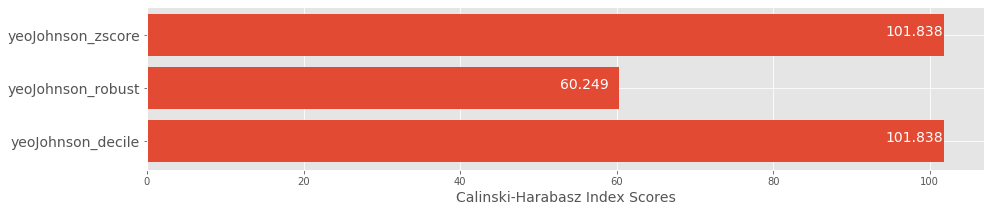

In [38]:
# visualise all performance scores using a barplot

fig, ax = plt.subplots(figsize=(15, 3))

ax.barh(permutation, calinski_harabasz_scores)
#ax.set_yticks(y_pos)
ax.set_yticklabels(permutation, fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Calinski-Harabasz Index Scores', fontsize=14)
#ax.set_title('Quality of Clusters from Different Dataset Permutations')

for i in range(len(permutation)):
    plt.text(x = calinski_harabasz_scores[i]-7.5, y = i, s = calinski_harabasz_scores[i].round(3), size = 14, color='white')

plt.show()

In [39]:
# extracting cluster details of the best-performing dataset

cluster_2_yJ_zscore_original.groupby("cluster_2_yeoJohnson_zscore_labels").size()

cluster_2_yeoJohnson_zscore_labels
0     45
1    127
2    162
dtype: int64

In [40]:
# appending cluster labels to main dataset

cluster_2_yeoJohnson_zscore["cluster_2_yeoJohnson_zscore_labels"]=cluster_2_yeoJohnson_zscore_labels

In [41]:
# creating a new dataset for plotting purposes

radar_2 = cluster_2_yeoJohnson_zscore.groupby("cluster_2_yeoJohnson_zscore_labels").mean().reset_index()

In [42]:
radar_2.head()

,cluster_2_yeoJohnson_zscore_labels,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_01,hseP_01
0,0,0.597901,0.637121,-0.134051,-0.402125,0.254926,-0.946790,-0.358339,-0.421215,0.659095,0.440651,-1.428003,0.908998,-0.766398,-0.582930
1,1,-0.400373,-0.720186,0.016504,0.284274,0.119745,0.577339,0.589164,0.294355,-0.156705,-0.536953,0.198673,0.458599,-0.784499,-0.802235
2,2,0.147789,0.387612,0.024298,-0.111156,-0.164687,-0.189608,-0.362337,-0.113755,-0.060233,0.298542,0.240917,-0.612018,0.827896,0.790837


In [43]:
# appending dataset average values to main dataset

radar_avg = cluster_2_yeoJohnson_zscore.drop(columns = ["cluster_2_yeoJohnson_zscore_labels"]).mean().reset_index()

In [44]:
# rename columns for legibility

radar_avg = radar_avg.rename(columns={"index":"var", 0: "value"})

In [45]:
radar_avg.head()

,var,value
0,SEC1_chg,-7.977650e-18
1,SEC2_chg,0.000000e+00
2,SEC3_chg,1.076983e-16
3,SEC4_chg,6.648042e-17
4,SEC5_chg,-5.983238e-18


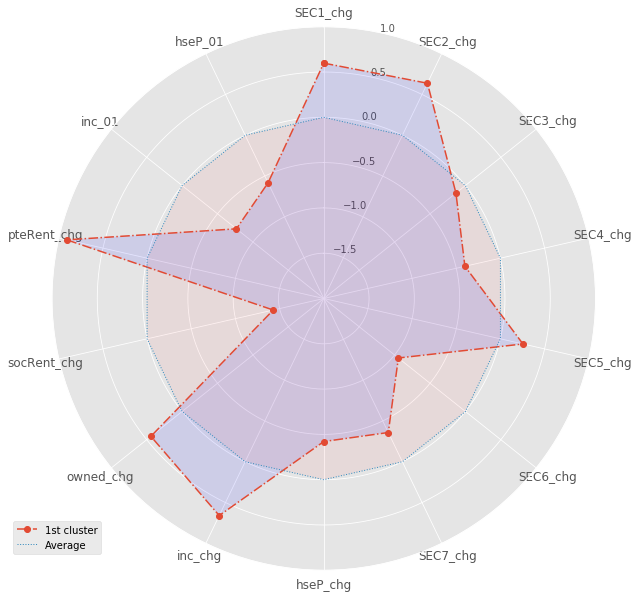

In [46]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
ax.set_rlabel_position(12)
plt.ylim(-2,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="1st cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

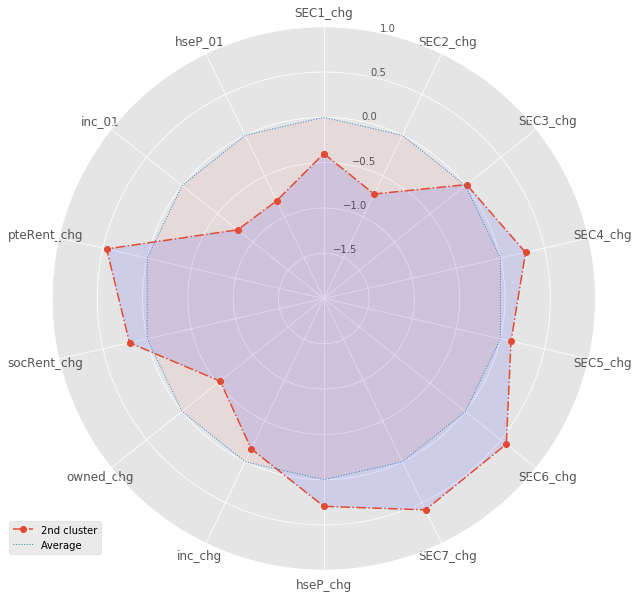

In [47]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 2nd cluster

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
ax.set_rlabel_position(12)
plt.ylim(-2,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_2.iloc[1,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="2nd cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

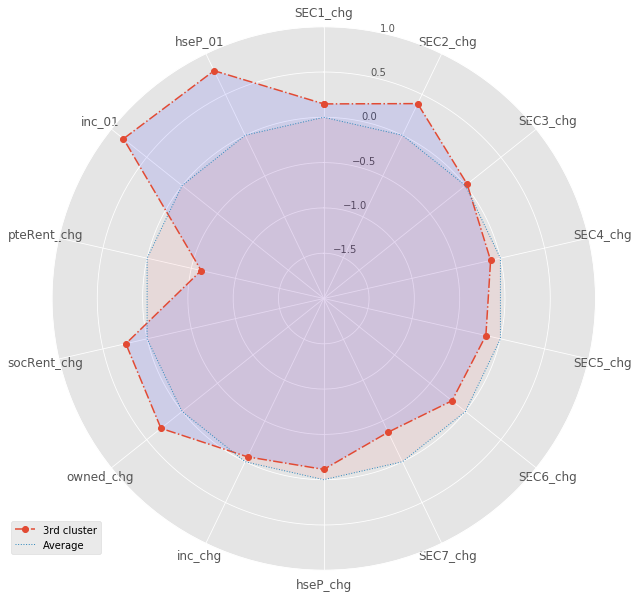

In [48]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 3rd cluster

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# plotting for 1st variable
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
ax.set_rlabel_position(12)
plt.ylim(-2,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_2.iloc[2,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="3rd cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [49]:
# parse cluster labels to derive their categories 

cluster_2_yJ_zscore_original = cluster_2_yJ_zscore_original.reset_index()
cluster_2_yJ_zscore_original["cluster_2_yeoJohnson_zscore_cat"]=""

for i in range(len(cluster_2_yJ_zscore_original)):
    if cluster_2_yJ_zscore_original.loc[i, "cluster_2_yeoJohnson_zscore_labels"]==0:
        cluster_2_yJ_zscore_original.loc[i, "cluster_2_yeoJohnson_zscore_cat"]="MargGen"
    elif cluster_2_yJ_zscore_original.loc[i, "cluster_2_yeoJohnson_zscore_labels"]==1:
        cluster_2_yJ_zscore_original.loc[i, "cluster_2_yeoJohnson_zscore_cat"]="SupGen"
    elif cluster_2_yJ_zscore_original.loc[i, "cluster_2_yeoJohnson_zscore_labels"]==2:
        cluster_2_yJ_zscore_original.loc[i, "cluster_2_yeoJohnson_zscore_cat"]="MainGen"

In [50]:
cluster_2_yJ_zscore_original.head()

,LSOA_Code,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_01,hseP_01,cluster_2_yeoJohnson_zscore_labels,cluster_2_yeoJohnson_zscore_cat
0,E01000136,2.27,2.55,3.71,3.32,-0.35,1.61,0.37,882.694147,58.633574,-6.45,-1.58,3.94,37.47,287.475,2,MainGen
1,E01000146,-1.47,-5.98,1.99,6.07,1.23,1.78,1.26,169.552220,31.619048,-7.65,-1.21,6.55,31.50,309.750,1,SupGen
2,E01000169,2.66,-2.43,-0.09,5.69,-0.31,1.73,3.29,190.330189,40.925267,-7.20,0.37,6.31,28.10,106.000,1,SupGen
3,E01000181,4.40,0.89,-0.75,4.36,0.71,0.37,-0.41,312.676056,49.576271,-4.47,-0.52,3.53,30.68,177.500,2,MainGen
4,E01000201,4.74,1.68,0.80,5.57,-1.48,1.24,-0.58,253.389831,46.307957,-2.34,-0.25,0.48,34.94,295.000,2,MainGen


In [51]:
# checkpoint - output file
# cluster_2_yJ_zscore_original.to_csv("cluster_2_yJ_zscore_original.csv")